In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.graph_objects as go

In [3]:
archivo_fifa = files.upload()

Saving fifa_datos.csv to fifa_datos.csv


In [66]:
fifa = pd.read_csv(io.StringIO(archivo_fifa['fifa_datos.csv'].decode('utf-8')))
#imprimir los primeros 5 datos del archivo
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [87]:
#Curacion de Datos
df= fifa
df = df.drop(labels='Loaned From', axis=1)
df= df.dropna()

Utilizar Matplot y Plotly para realizar las graficas.
1.  Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

*   Debajo 125 Lbs.
*   125-150
*   150-175
*   175 o superior

In [88]:
#Curamos la columna de Peso
df['Weight'] = df['Weight'].str.replace(r'\D', '')
df['Weight'].isnull().sum()
df['Weight'] = df['Weight'].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


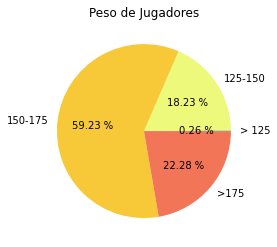

In [89]:
data1 = df.loc[df['Weight'] < 125].count()[0]
data2 = df.loc[df['Weight'].between(125, 150)].count()[0]
data3 = df.loc[df['Weight'].between(151, 175)].count()[0]
data4 = df.loc[df['Weight'] > 175].count()[0]

plt.figure()

etiquetas = ['> 125', '125-150', '150-175', '>175']
colores = ['#9CF09B', '#ECF97A', '#F7C837', '#F27557']
plt.pie([data1, data2, data3, data4], labels=etiquetas, colors=colores, autopct='%.2f %%')
plt.title('Peso de Jugadores')
plt.show()

2 Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90

In [92]:
data4 = df.loc[df['Overall'].between(40, 49)].count()[0]
data5 = df.loc[df['Overall'].between(50, 59)].count()[0]
data6 = df.loc[df['Overall'].between(60, 69)].count()[0]
data7 = df.loc[df['Overall'].between(70, 79)].count()[0]
data8 = df.loc[df['Overall'].between(80, 89)].count()[0]
data9 = df.loc[df['Overall'].between(90, 99)].count()[0]

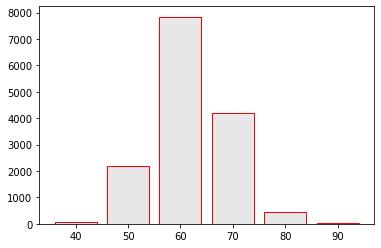

In [106]:
#Grafico de Barras
etiquetas = ['40', '50', '60', '70', '80', '90']
valores = [data4,data5,data6,data7,data8,data9]
plt.figure()
barras = plt.bar(etiquetas, valores, color=(0.1, 0.1, 0.1, 0.1),edgecolor='red')


plt.show()  

3 Investigar alguna herramienta o software que permita generar reportes con Python utilizando CodeLabs.

Se puede utilizar la herramienta de GSuite y GCP para generar los reportes. A continuacion la url que detalla paso a paso como realizarlo.

https://codelabs.developers.google.com/codelabs/drive-gcs-vision-sheets#0

Tambien se encuentra la herramienta de FPDF y Shutil para generar estos informes:

https://towardsdatascience.com/how-to-create-pdf-reports-with-python-the-essential-guide-c08dd3ebf2ee